# CHEN 2450 - Coding Activity
## Direct Solvers can be expensive
## Prof. Tony Saad

In [13]:
import numpy as np
from numpy import diag
from numpy.linalg import solve
import time
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from tqdm import tqdm

The following solves the stead state heat transfer equation in one-dimension subject to a heating source somewhere along the material
\begin{equation}
\frac{\mathrm{d}^2T}{\mathrm{d}x^2} = -\frac{1}{k}S(x)
\end{equation}

In [57]:
# USER: input number of equations
n = 10000

#==============================
# DO NOT MODIFY BELOW THIS LINE
#==============================
def source(x):
    σ = 0.1
    x0 = 2.0/3.0
    return 0.1*np.exp(-(x-x0)**2/σ/σ)

TL = 300
TR = 350
k = 1e-5

L = 1.0
dx = L /(n-1)
x = np.linspace(0,L,n)


d = -2.0*np.ones(n)
d[0] = 1.0
d[-1] = 1.0

l = np.ones(n-1)
l[-1] = 0.0

u = np.ones(n-1)
u[0] = 0.0

A = diag(l,-1) + diag(d,0) + diag(u,1)

# build the RHS
b = - dx*dx*source(x)/k
b[0] = TL
b[-1] = TR

In [58]:
# solve using build in solver.
tic = time.time()
T = solve(A,b)
toc = time.time()
print('It took', toc - tic, 's to solve the system with', n, 'equations')

It took 5.657549619674683 s to solve the system with 10000 equations


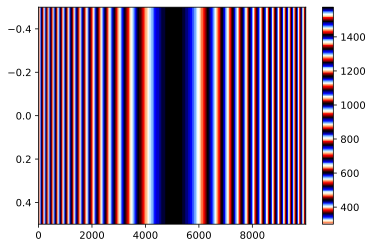

In [59]:
# plot the temperature
T = np.reshape(T,[1,n])
plt.imshow(T,cmap='flag',aspect='auto')
plt.colorbar()